In [1]:
# imports
import os
import sys

# Get the directory of the current file
current_dir = os.path.dirname(os.path.realpath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
# Add the current directory and parent directory to the system path
sys.path.insert(0, current_dir)
sys.path.insert(0, parent_dir)
import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
from pixel_setter import play_video
from scipy.ndimage import uniform_filter
import importlib
from EMA_functions import *
import matplotlib.animation as animation
from DIC_functions import *
import glob
import ast
# import re


# Import test data
df_file_description = pd.read_csv('I:/My Drive/PHD/HSC/file_descriptions_wEMA.csv')
# Back up the data
df_file_description = df_file_description.loc[:, ~df_file_description.columns.str.startswith('Unnamed')]
df_file_description.to_csv('I:/My Drive/PHD/HSC/file_descriptions_wEMA_backup.csv')

# List all files
files = glob.glob('D:/thijsmas/HSC/**/*.cihx', recursive=True)

# if 'double_tap' not in df_file_description.columns:
    # df_file_description['double_tap'] = False


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\napari\utils\misc.py:428: DeprecationWarning: `CallDefault` in napari v0.5.0 and will be removed in v0.6.0.
  warnings.warn(


In [2]:
df_file_description.columns

Index(['filename', 'path', 'ecc', 'loc', 'mass', 'taut/loose', 'impact/pluck',
       'version', 'n_frames', 'fps', 'Oversatured pixels',
       'Undersatured pixels', 'prey_ij', 'spider_ij', 'peak_n', 'nut_idx',
       'd_lim', 'smooth_lim', 'max_drift', 'max_end_drift', 'lower', 'upper',
       'pol_order_high', 'added_damping', 'near_zero_threshold',
       'approximate_height', 'peak_F', 'peak_F_threshold', 'shift',
       'test_number', 'higher', 'spider_ij_d', 'prey_ij_d', 'id0_cam',
       'id0_for', 'double_tap'],
      dtype='object')

In [40]:
ecc = 2
floc = 8
version = 0

filtered_df = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['loc'] == floc) & (df_file_description['version'] == version)]

id_n = 0
filename = filtered_df['filename'].values[id_n]

row_i = df_file_description[df_file_description['filename'] == filename].index[0]

print(filename)

filtered_df

Full_web_ecc2_new_Floc8_v0_S01.cihx


,filename,path,ecc,loc,mass,taut/loose,impact/pluck,version,n_frames,fps,...,peak_F,peak_F_threshold,shift,test_number,higher,spider_ij_d,prey_ij_d,id0_cam,id0_for,double_tap
90,Full_web_ecc2_new_Floc8_v0_S01.cihx,H:\My Drive\PHD\HSC\ecc2\web0\rev1\Full_web_ec...,2.0,8.0,True,Loose,Impact,0.0,7000.0,8000.0,...,1.1465149590123456,0.5,"(0, 0)",1.0,300.0,"(509.0776344086022, 236.6187612903226)","(627.1129032258065, 414.55252473118276)",208.0,21896.0,False


(0.8453125, 0.8653125)

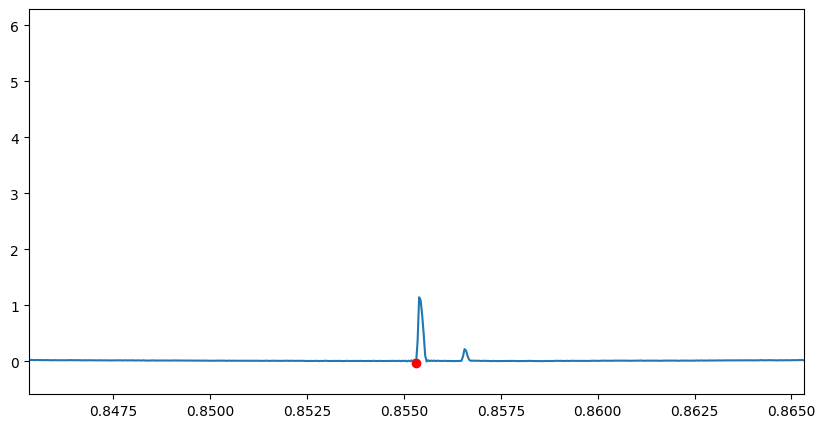

In [41]:
# file = files[30]
# name_video = os.path.basename(file)
# root_video = os.path.dirname(file)
df_filtered = df_file_description[df_file_description['filename'].isin([filename])]
indices = df_filtered.index


EMA_structure = EMA_Structure(filename)
EMA_structure.open_impact_data()
EMA_structure.initialize_signals()

id0_for = int(df_filtered['id0_for'].item())

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(EMA_structure.t_force_raw, EMA_structure.force_raw)
ax.plot(EMA_structure.t_force_raw[id0_for], EMA_structure.force_raw[id0_for], 'ro')
ax.set_xlim(EMA_structure.t_force_raw[id0_for] - 0.01, EMA_structure.t_force_raw[id0_for] + 0.01)

In [42]:
df_file_description.loc[row_i, 'double_tap'] = True
filtered_df = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['loc'] == floc) & (df_file_description['version'] == version)]
filtered_df

,filename,path,ecc,loc,mass,taut/loose,impact/pluck,version,n_frames,fps,...,peak_F,peak_F_threshold,shift,test_number,higher,spider_ij_d,prey_ij_d,id0_cam,id0_for,double_tap
90,Full_web_ecc2_new_Floc8_v0_S01.cihx,H:\My Drive\PHD\HSC\ecc2\web0\rev1\Full_web_ec...,2.0,8.0,True,Loose,Impact,0.0,7000.0,8000.0,...,1.1465149590123456,0.5,"(0, 0)",1.0,300.0,"(509.0776344086022, 236.6187612903226)","(627.1129032258065, 414.55252473118276)",208.0,21896.0,True


In [43]:
df_file_description.to_csv('I:/My Drive/PHD/HSC/file_descriptions_wEMA.csv')